In [151]:
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

alcohol sugar pH - 화이트와인, 레드와인 분류

In [152]:
wine = pd.read_csv('https://bit.ly/wine-date')
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [153]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [154]:
# 위 데이터를 가지고 로지스틱 회귀로 모델을 구현
# datas = wine[wine.columns.difference(['class'])].to_numpy()
# results = wine['class'].to_numpy()

In [155]:
# train_input,test_input,train_target,test_target = train_test_split(
#     datas,results, random_state=42
# )

In [156]:
wine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

In [157]:
datas = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [158]:
# testsize 디폴트 0.25
train_input,test_input,train_target,test_target = train_test_split(
    datas,target,random_state=42
)

In [159]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [160]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)

LogisticRegression()

In [161]:
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.7859195402298851
0.7655384615384615


In [162]:
# 경사하강법 머신러닝
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss',max_iter=100,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.7736042692939245
0.7513846153846154


In [163]:
classes = np.unique(train_target)
classes

array([0., 1.])

In [164]:
sc = SGDClassifier(loss='log_loss',max_iter=100,random_state=42)
sc.partial_fit(train_scaled,train_target,classes=classes)

SGDClassifier(loss='log_loss', max_iter=100, random_state=42)

In [165]:
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.7596469622331691
0.7323076923076923


In [166]:
train_score = []
test_score = []

for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

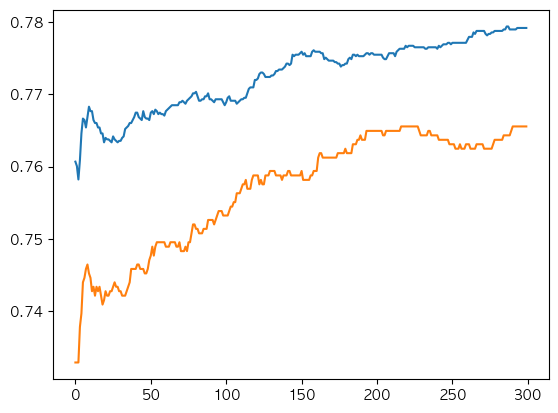

In [167]:
plt.plot(train_score)
plt.plot(test_score)

In [168]:
# 피쳐가 너무 적고, 정답률이 높지 않아서 다른 모델을 대입해서 사용

In [170]:
# 결정트리 모델
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

# 순수노드 나올 떄까지 훈련
# 과대적합 - 85% 되면 높은 정답률을 가짐

0.9973316912972086
0.8516923076923076


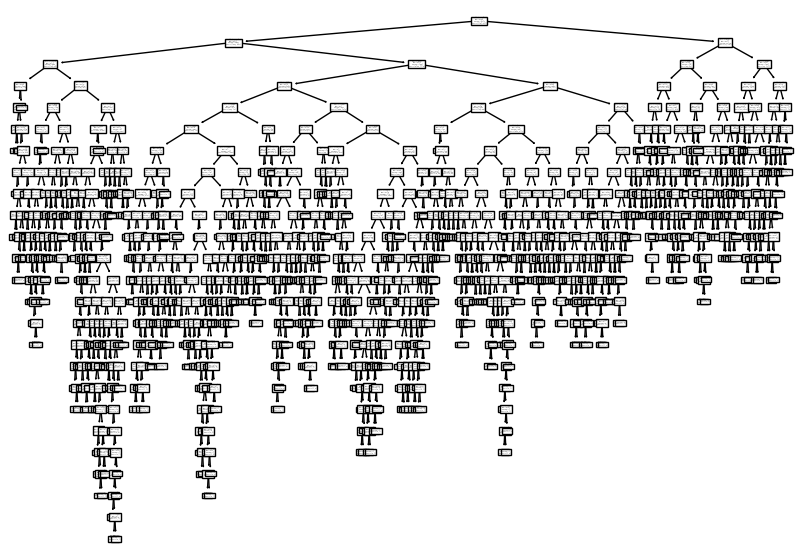

In [171]:
from sklearn.tree import plot_tree
# plt.figure(figsize=(10,7))
# plot_tree(dt)
# plt.show()

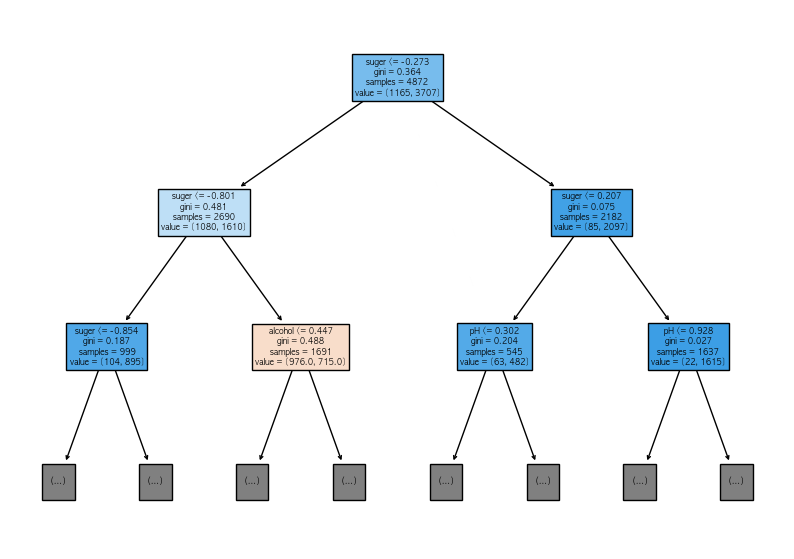

In [176]:
# plt.figure(figsize=(10,7))
# # max_depth 노드 : 가지의 깊이 조정
# # filled : 색상조정, 진한 파란색 - 양성클래스(1), 주황색 - 음성클래스(0)
# plot_tree(dt,max_depth=2,filled=True,feature_names=['alcohol','suger','pH'])
# plt.show()

불순도(gini)가 높은 쪽으로 내려감<br>
0.367 - 0.481<br>
0.367 - 0.069 채택

In [197]:
# 가지치기를 해서 과대 적합문제를 해결
#3,4,5,6...,10 가장 효율이 좋은 모델을 적용
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [198]:
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.8499589490968801
0.8363076923076923


In [199]:
wine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

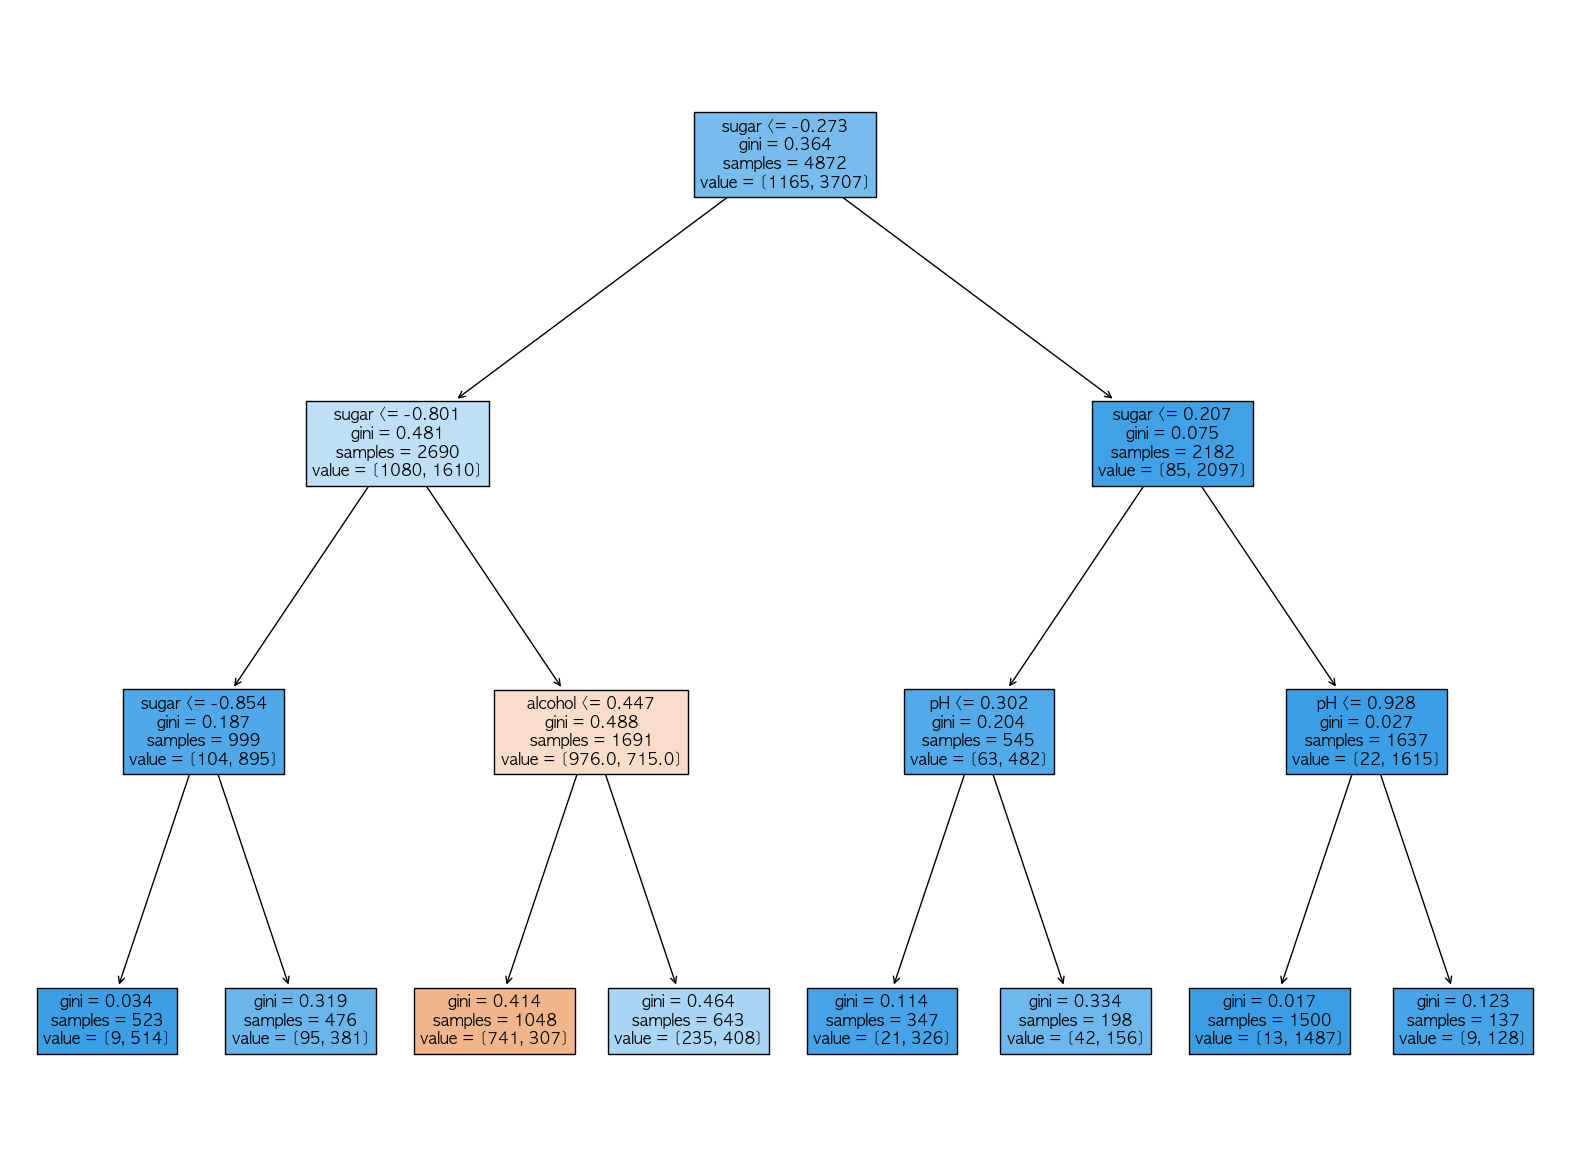

In [200]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=wine.columns)
plt.show()

In [201]:
# 가지치기를 해서 과대 적합 문제를 해결
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.8499589490968801
0.8363076923076923


In [214]:
# min_impurity_decrease 최소 불순도 조정해서 속도개선, 효율도 올릴 수 있도록 모델을 조정
# 부모의 불순도 - 자식의 불순도 크기 큰 쪽을 선택, 차이가 0.005도 안나면 그 노드에서 결정
# 과대적합 해결 - max_depth, min_impurity_decrease
dt = DecisionTreeClassifier(min_impurity_decrease=0.03,random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))


0.8144499178981938
0.8086153846153846
